In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots

In [71]:
train_data = pd.read_csv('./mymoviedb.csv', engine='python')

In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [81]:
column_types = {'Title':'string', 'Overview':'string', 'Original_Language':'string'}

train_data = pd.read_csv('./mymoviedb.csv', engine='python', dtype=column_types)

In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   string 
 2   Overview           9828 non-null   string 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   string 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(5), string(3)
memory usage: 691.8+ KB


In [118]:
train_data_clean = train_data_clean.drop(columns=['Poster_Url'])

In [142]:
train_data_clean = train_data_clean.drop(columns=['Overview'])

In [143]:
train_data_clean = train_data_clean.dropna()

In [144]:
train_data_clean.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


# Output Variable
    Genre
# Inputvariable
    Rest

In [145]:
train_data_clean.shape

(9826, 7)

In [146]:
print(train_data.isnull().sum())

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64


In [147]:
print(train_data_clean.isnull().sum())

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64


In [156]:
train_data.describe(include='all')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
count,9837,9828,9828,9827.000000,9827,9827,9827,9826,9826
unique,5903,9514,9823,NaN,3267,75,44,2337,9826
top,2022-03-10,Beauty and the Beast,Dr. Raichi is one of the only survivors of the...,NaN,0,6.4,en,Drama,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
freq,16,4,2,NaN,100,435,7569,466,1
mean,NaN,NaN,NaN,40.320570,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,108.874308,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,16.127500,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,21.191000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,35.174500,NaN,NaN,NaN,NaN,NaN


In [157]:
train_data_clean.describe(include='all')

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
count,9826,9826,9826.000000,9826.000000,9826.000000,9826,9826
unique,NaN,9512,NaN,NaN,NaN,43,2337
top,NaN,Alice in Wonderland,NaN,NaN,NaN,en,Drama
freq,NaN,4,NaN,NaN,NaN,7569,466
mean,2006-09-23 04:47:14.276409600,NaN,40.323951,1392.943721,6.439467,NaN,NaN
min,1902-04-17 00:00:00,NaN,13.354000,0.000000,0.000000,NaN,NaN
25%,2000-10-17 12:00:00,NaN,16.128250,146.000000,5.900000,NaN,NaN
50%,2011-09-12 00:00:00,NaN,21.195000,444.000000,6.500000,NaN,NaN
75%,2017-11-22 00:00:00,NaN,35.179250,1376.000000,7.100000,NaN,NaN
max,2024-07-03 00:00:00,NaN,5083.954000,31077.000000,10.000000,NaN,NaN


In [150]:
train_data_clean['Vote_Count'] = train_data_clean['Vote_Count'].astype(int)

In [151]:
train_data_clean['Release_Date'] = pd.to_datetime(train_data_clean['Release_Date'])

In [152]:
train_data_clean['Vote_Average'] = train_data_clean['Vote_Average'].astype(float)

In [153]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   string        
 2   Popularity         9826 non-null   float64       
 3   Vote_Count         9826 non-null   int32         
 4   Vote_Average       9826 non-null   float64       
 5   Original_Language  9826 non-null   string        
 6   Genre              9826 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(1), string(2)
memory usage: 575.7+ KB


In [154]:
train_data_clean.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826,9826.000000,9826.000000,9826.000000
mean,2006-09-23 04:47:14.276409600,40.323951,1392.943721,6.439467
min,1902-04-17 00:00:00,13.354000,0.000000,0.000000
25%,2000-10-17 12:00:00,16.128250,146.000000,5.900000
50%,2011-09-12 00:00:00,21.195000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.179250,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000
std,NaN,108.879332,2611.303856,1.129797


In [161]:
train_data_clean_numeric=train_data_clean.select_dtypes(include=['number'])

In [166]:
train_data_clean_numeric.head()

,Popularity,Vote_Count,Vote_Average
0,5083.954,8940,8.3
1,3827.658,1151,8.1
2,2618.087,122,6.3
3,2402.201,5076,7.7
4,1895.511,1793,7.0


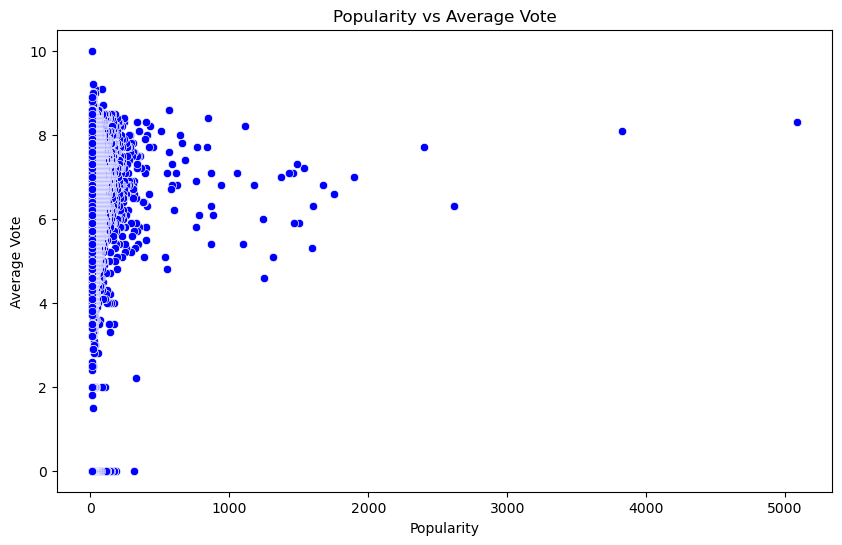

In [169]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Popularity', y='Vote_Average', data=train_data_clean, color='blue')
plt.title('Popularity vs Average Vote')
plt.xlabel('Popularity')
plt.ylabel('Average Vote')
plt.show()